code-2.py

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
np.random.seed(36)
npoint = 6
theta = np.pi/4
r = 0.9
iter_max = 20
npoint = 10
iter = 0
iter_points = {}

def generate_points(low,high, npoint):
    x_coordinates = np.random.uniform(low, high, npoint)
    y_coordinates = np.random.uniform(low, high, npoint)
    points = np.column_stack((x_coordinates, y_coordinates))
    return points

def objective_function(x,y):
    z = x**2 +y**2
    return z

points = generate_points(-5,5,npoint)
iter_points[iter] = points
iter_points

{0: array([[ 2.28507192,  4.47232073],
        [ 1.01614212,  4.04318244],
        [ 4.52180667,  0.50130156],
        [-3.56826552, -3.02991712],
        [ 3.0735913 , -2.67967169],
        [-1.36785403, -4.97634025],
        [-3.13443188, -2.73944455],
        [-2.40848762, -1.24656762],
        [ 1.29762343, -0.47256295],
        [-4.67439078, -2.5392081 ]])}

In [45]:
R2 = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
S2 = r*R2
S2

array([[ 0.6363961, -0.6363961],
       [ 0.6363961,  0.6363961]])

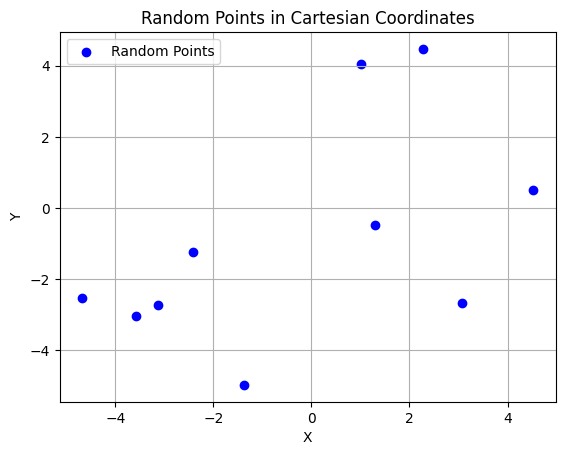

array([[ 2.28507192,  4.47232073],
       [ 1.01614212,  4.04318244],
       [ 4.52180667,  0.50130156],
       [-3.56826552, -3.02991712],
       [ 3.0735913 , -2.67967169],
       [-1.36785403, -4.97634025],
       [-3.13443188, -2.73944455],
       [-2.40848762, -1.24656762],
       [ 1.29762343, -0.47256295],
       [-4.67439078, -2.5392081 ]])

In [52]:
# Plot the points
plt.scatter(iter_points[0][:,0], iter_points[0][:,1], c='b', marker='o', label='Random Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points in Cartesian Coordinates')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

points

In [37]:
def cari_minimum(set_of_points):
    z = []
    z_min = 10**100
    for i in range (len(set_of_points)):
        z.append(objective_function(set_of_points[i,0],set_of_points[i,1]))
        if z[i]<z_min:
            z_min = z[i]
            idx_min = i
    x_min = set_of_points[idx_min]
    return z_min,idx_min,x_min
(z_star,idx_star,x_star) = cari_minimum(points)
x_star

array([ 1.29762343, -0.47256295])

In [50]:
np.dot(S2,iter_points[0][0].reshape(-1,1)) - np.dot((S2-np.identity(2)),x_star.reshape(-1,1))

array([[-1.22087291],
       [ 3.30275013]])

In [51]:
iter_points[iter+1] = np.copy(iter_points[iter])
for i in range (npoint):
    poin = np.dot(S2,iter_points[iter][i].reshape(-1,1)) - np.dot((S2-np.identity(2)),x_star.reshape(-1,1))
    iter_points[iter+1][i] = poin.T
iter_points[iter+1]

array([[ 0.53948966, -1.83439752],
       [ 0.49722937, -1.70943701],
       [ 0.14843524, -2.05466465],
       [-0.1993089 , -1.25797788],
       [-0.16481775, -1.91204862],
       [-0.39098698, -1.474668  ],
       [-0.170704  , -1.30070056],
       [-0.02368983, -1.37218944],
       [ 0.0525319 , -1.73715647],
       [-0.1509853 , -1.14904989]])

In [44]:
def update_point(set_of_points):
    (z_star,idx_star,x_star) = cari_minimum(set_of_points)
    new_set_of_points = np.copy(set_of_points)
    for i in range (len(new_set_of_points)):
        poin = np.dot(S2,set_of_points[i].reshape(-1,1)) - np.dot((S2-np.identity(2)),x_star.reshape(-1,1))
        new_set_of_points[i] = poin.T
    return new_set_of_points
aa = update_point(iter_points[iter])
aa

array([[-1.22087291,  3.30275013],
       [-1.75531294,  2.22210621],
       [ 2.72971751,  2.19905828],
       [-0.17151911, -5.19668594],
       [ 3.83243786, -0.74693931],
       [ 2.46751028, -5.03504874],
       [-0.08028468, -4.73574029],
       [-0.56835764, -3.32369113],
       [ 1.29762343, -0.47256295],
       [-1.18773822, -5.58833444]])

In [49]:
while iter <= iter_max:
    iter_points[iter+1] = update_point(iter_points[iter])
    iter += 1
iter_points

{0: array([[ 2.28507192,  4.47232073],
        [ 1.01614212,  4.04318244],
        [ 4.52180667,  0.50130156],
        [-3.56826552, -3.02991712],
        [ 3.0735913 , -2.67967169],
        [-1.36785403, -4.97634025],
        [-3.13443188, -2.73944455],
        [-2.40848762, -1.24656762],
        [ 1.29762343, -0.47256295],
        [-4.67439078, -2.5392081 ]]),
 1: array([[-1.22087291,  3.30275013],
        [-1.75531294,  2.22210621],
        [ 2.72971751,  2.19905828],
        [-0.17151911, -5.19668594],
        [ 3.83243786, -0.74693931],
        [ 2.46751028, -5.03504874],
        [-0.08028468, -4.73574029],
        [-0.56835764, -3.32369113],
        [ 1.29762343, -0.47256295],
        [-1.18773822, -5.58833444]]),
 2: array([[-2.70773235,  0.32727033],
        [-2.36013033, -0.7005628 ],
        [ 0.50879318,  2.13902548],
        [ 3.36908031, -4.413933  ],
        [ 3.0853815 ,  0.96597103],
        [ 4.94568304, -2.63159969],
        [ 3.13379753, -4.06252774],
        [ 1.924